In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
from bayesfilt import KalmanFilter, UnscentedKalmanFilter, ConstantVelocity1D, LinearObservationModel

In [4]:
# generate noisy data
dt = 0.1
tlen = 60
ncycles = 4
t = np.linspace(0,tlen,int(tlen/dt)+1)
ytrue = np.array([np.sin(t*ncycles*2.*np.pi/tlen), np.cos(t*ncycles*2.*np.pi/tlen)*ncycles*2.*np.pi/tlen])
yobs = ytrue.copy()
yobs[0,:] += np.random.randn(t.size)*0.2
yobs[1,:] += np.random.randn(t.size)*0.1

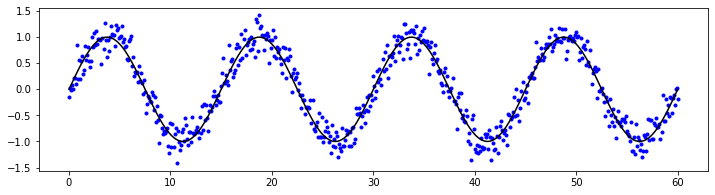

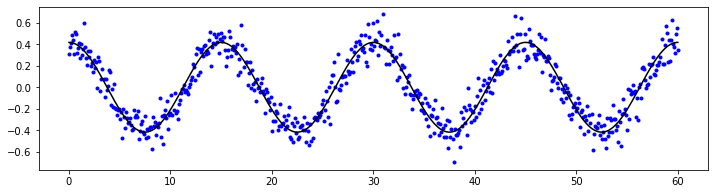

In [5]:
for i in range(yobs.shape[0]):
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(t,yobs[i,:], '.b')
    ax.plot(t,ytrue[i,:], '-k')

In [6]:
# kalman filter
mm = ConstantVelocity1D()
dt = 0.05
mm.update(dt = dt, sigmas = [0.03])
om = LinearObservationModel(nx = 2, obs_state_inds = [0, 1])
om.R = np.diag([0.2, 0.1])**2

kf = KalmanFilter(nx = 2, ny = 2, dt = dt)
kf.F = mm.F.copy()
kf.Q = mm.Q.copy()
kf.H = om.H.copy()
kf.R = om.R.copy()
kf.initiate_state(t[0], yobs[:,0], np.diag([0.2, 0.1]))
kf.filter(t[1:], [ix for ix in yobs[:,1:].T])
kf.smoother()

In [7]:
# unscented kalman filter
mm = ConstantVelocity1D()
dt = 0.05
mm.update(dt = dt, sigmas = [0.03])
om = LinearObservationModel(nx = 2, obs_state_inds = [0, 1])
om.R = np.diag([0.2, 0.1])**2

ukf = UnscentedKalmanFilter(nx = 2, ny = 2, dt = dt)
ukf.f = mm.f
ukf.Q = mm.Q.copy()
ukf.h = om.h
ukf.R = om.R.copy()
ukf.initiate_state(t[0], yobs[:,0], np.diag([0.2, 0.1]))
ukf.filter(t[1:], [ix for ix in yobs[:,1:].T])
#ikf.smoother()

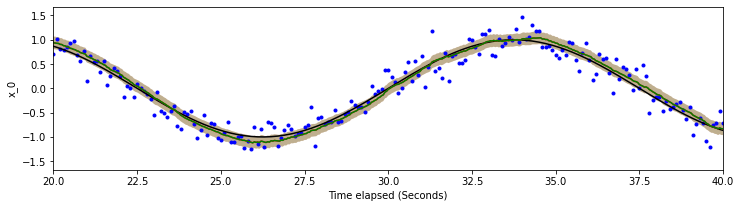

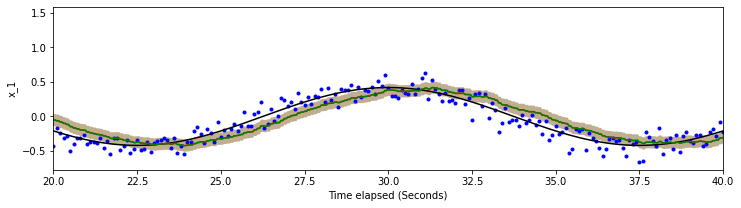

In [8]:
for i in range(kf.nx):
    fig, ax = plt.subplots(figsize=(12,3))
    ax.plot(t, yobs[i,:], '.b')
    ax.plot(t, ytrue[i,:], '-k')
    kf.plot_state(ax, i, 'r', 'filter', linestyle='-')
    ukf.plot_state(ax, i, 'g', 'filter', linestyle='-')
    ax.set_xlim([20,40])

In [9]:
for i in range(2):
    print(np.allclose(kf.get_state_mean(i), ukf.get_state_mean(i)))

True
True


In [10]:
kf.get_state_mean(0) == ukf.get_state_mean(0)

array([ True, False,  True, ..., False, False, False])

In [6]:
10 //2

5

In [11]:
x = 5*2

In [13]:
type(x)

int